# 1-Dimensional Time-independent Schrödinger Equation



The 1-dimensional time-dependent Schrödinger equation is given by:

$$
i \hbar \frac{\partial \Psi(x,t)}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \Psi(x,t)}{\partial x^2} + V(x,t) \Psi(x,t)
$$

Where:
- $\Psi(x,t)$ is the wave function of the particle,
- $\hbar$ is the reduced Planck's constant,
- $m$ is the mass of the particle,
- $V(x,t)$ is the potential energy,
- $x$ is the position,
- $t$ is the time.

It's easy to prove that if 
$$
V(x,t)=V(x),\; \forall t \in \mathbb{R}
$$
the wave functions that solve the Schrödinger equations have the following form:
$$
\Psi(x,t)=\phi_n(t)\psi_n(x) = e^{-i\frac{E_n}{\hbar}t}\psi_n(x),
$$
where $E_n$ and $\psi_n(x)$ are respectively the n-th eigenvalue and its corresponding normalized eigenfunction that solve the following equation (**time independent Schrödinger equation**):
$$
\hat{H}\psi(x)=E\psi(x).
$$
The hamiltonian operator $\hat{H}$ is defined as follows:
$$
\hat{H}=-\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x),
$$
So we can finally express the time independent Schrödinger equation as:
$$
-\frac{\hbar^2}{2m} \frac{\partial^2\psi(x)}{\partial x^2} + V(x)\psi(x)=E\psi(x),
$$


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import math
from IPython.display import HTML

N = 500
dy = 1/N
y = np.linspace(0,1,N+1)

In [21]:
def mL2V(y):
    return 1000*(y-0.5)**2

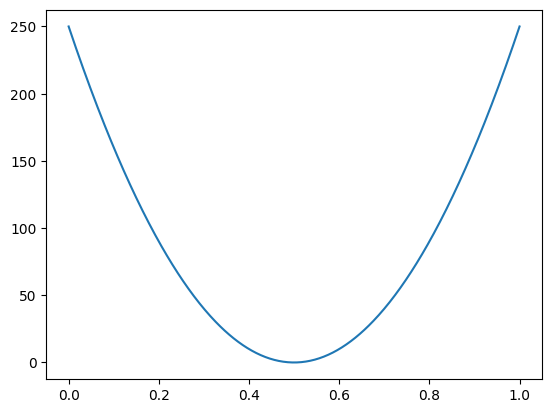

In [22]:
V = mL2V(y)
plt.plot(y,V)